In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import os

## Carregando dados
- Esses dados são features de uma camada extraída de uma CNN

In [2]:
data = pd.read_csv("features.csv")
labels_name = ["ACK", "BCC", "MEL", "NEV", "SCC", "SEK"]
data_values = data[labels_name].values
data_labels = data["REAL"].values

In [3]:
data.shape

(383, 8)

In [4]:
data.head()

,image,REAL,ACK,BCC,MEL,NEV,SCC,SEK
0,PAT_684_1302_588,BCC,0.158746,0.597212,0.000326,0.002794,0.197214,0.043708
1,PAT_1995_4080_695,ACK,0.981366,0.000963,0.003383,0.001381,0.006646,0.006261
2,PAT_759_1538_566,BCC,0.020193,0.716820,0.000131,0.001117,0.255400,0.006340
3,PAT_106_159_325,BCC,0.032365,0.724717,0.001036,0.002099,0.234462,0.005322
4,PAT_42_58_13,BCC,0.022511,0.639920,0.000700,0.024158,0.311709,0.001003


## Reduzindo a dimensionalidade usando PCA
- [Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Variancia de cada componente:
[0.43890958 0.26232004]
Total de variância explicada: 0.7012296195176386
Shape das componentes: (383, 2)


<Axes: >

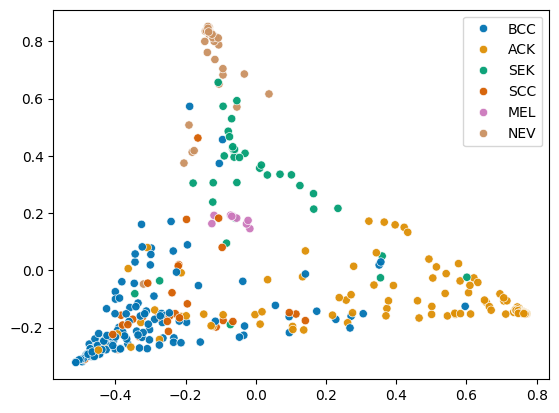

In [5]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[labels_name].values)
print("Variancia de cada componente:")
print(pca.explained_variance_ratio_)
print (f"Total de variância explicada: {sum(pca.explained_variance_ratio_)}")
print(f"Shape das componentes: {pca_data.shape}")
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data_labels, alpha=0.95, palette="colorblind")

## Reduzindo a dimensionalidade usando t-SNE
- [Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 383 samples in 0.003s...
[t-SNE] Computed neighbors for 383 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 383 / 383
[t-SNE] Mean sigma: 0.029205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.567657
[t-SNE] KL divergence after 1550 iterations: 0.261616


<Axes: >

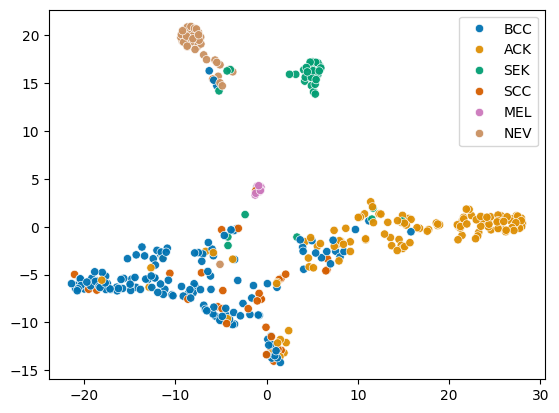

In [6]:
seed = 10
tsne = TSNE(random_state=seed, verbose=1, n_iter=2000, n_components=2).fit_transform(data_values)
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=data_labels, alpha=0.95, palette="colorblind")

___
# Exercício
- Utilizando o submódulo `datasets`, carregue a base de MNIST e faça o plot dela usando ambos os métodos
___

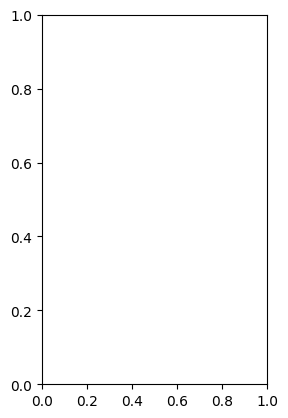

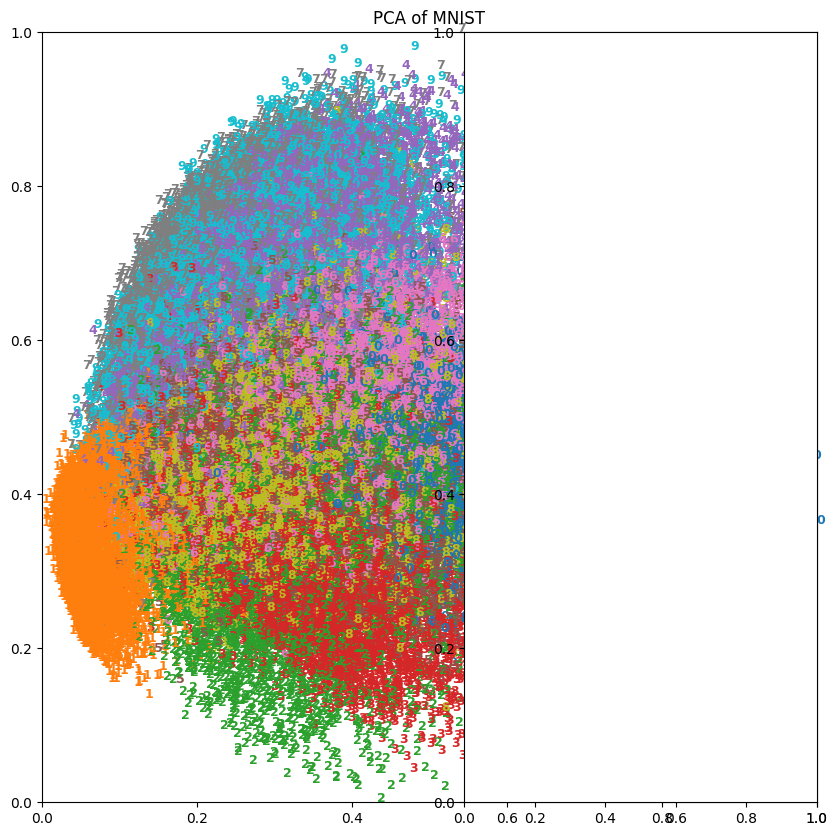

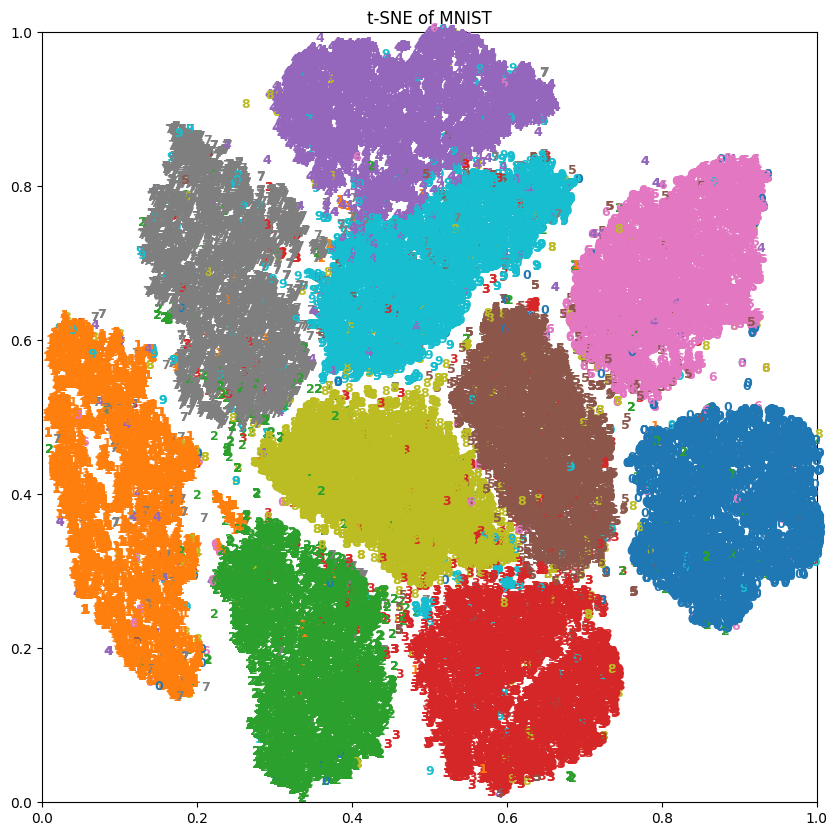

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Passo 1: Carregar a base de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convertendo os labels para inteiros
y = y.astype(int)

# Passo 2: Pré-processamento dos dados
# Os dados já estão em formato vetorial (70000 x 784), não há necessidade de achatamento adicional
# Opcional: Normalizar os dados
X = X / 255.0

# Passo 3: Aplicar PCA
pca = PCA(n_components=50)  # Reduzindo para 50 componentes
X_pca = pca.fit_transform(X)

# Passo 4: Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Passo 5: Plotar os Resultados
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.tab10(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if title is not None:
        plt.title(title)

# Plot PCA
plt.subplot(1, 2, 1)
plot_embedding(X_pca[:, :2], y, "PCA of MNIST")

# Plot t-SNE
plt.subplot(1, 2, 2)
plot_embedding(X_tsne, y, "t-SNE of MNIST")

plt.show()
